<a href="https://colab.research.google.com/github/DIVYANSHU-CHAUDHARI/Shortest-path-Cluster-head-Nodes/blob/main/Research_Assg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
SN = {}
CH = {}
CHN = {1:(2,6,5),2:(1,5,6,7,3),3:(2,6,7,8,4),4:(3,7,8),5:(9,10,6,2,1),6:(9,10,11,5,7,1,2,3),7:(10,6,11,12,8,2,3,4),8:(12,11,7,3,4),9:(13,14,10,6,5),10:(13,14,15,9,11,5,6,7),11:(14,15,16,10,12,6,7,8),12:(8,7,11,15,16),13:(9,10,14,17),14:(13,9,10,11,15,17),15:(14,10,11,12,16,17),16:(15,11,12,17),17:(13,14,15,16)}
#Initializing all nodes

for i in range(100):
  SN[i] = {
      'Nodeid':0,
      'x':random.randint(1,100),
      'y':random.randint(1,100),
      'clusterNo' : 0,
      'CHid' : 0,
      'CHdist':0
      }
#Initializing head Nodes

for i in range(16):
  CH[i] = {
      'NodeId':0,
      'clusterNo':0,
      'DistSinkNode':0,
      'Clusterpath':0
  }

In [94]:
#Initializing Nodeid
for i in range(100):
  SN[i]['Nodeid'] = 'SN[' + str(i+1) + ']' 

In [95]:
#Assigning cluster nos to all the nodes based on x and y coordinates
for x in range(0,76,25):
  for y in range(0,76,25):
    for i in range(100):
      if SN[i]['x']>x and SN[i]['x']<=x+25 and SN[i]['y']>y and SN[i]['y']<=y+25:
        if y == 0:SN[i]['clusterNo'] = 1+x//25
        elif y == 25:SN[i]['clusterNo'] = 5+x//25
        elif y==50:SN[i]['clusterNo'] = 9+x//25
        elif y == 75:SN[i]['clusterNo'] = 13+x//25
        

In [96]:
#Forming a clusters list of list with each list representing a cluster.
#Each cluster list contains nodeid no. of its nodes
clusterList = []
tempList=[]
for n in range(1,17):
  tempList=[]
  for i in range(0,100):
    if SN[i]['clusterNo'] == n:
      tempList.append(i)
  clusterList.append(tempList)


In [97]:
#Assigning cluster no. and Nodeid to each head node randomly from each cluster of the cluster List.
for i in range(len(clusterList)):
  CH[i]['clusterNo'] = i+1
  CH[i]['NodeId'] = 'SN[' + str(random.choice(clusterList[i])).zfill(2) + ']'

In [98]:
print(CH)

{0: {'NodeId': 'SN[42]', 'clusterNo': 1, 'DistSinkNode': 0, 'Clusterpath': 0}, 1: {'NodeId': 'SN[13]', 'clusterNo': 2, 'DistSinkNode': 0, 'Clusterpath': 0}, 2: {'NodeId': 'SN[69]', 'clusterNo': 3, 'DistSinkNode': 0, 'Clusterpath': 0}, 3: {'NodeId': 'SN[77]', 'clusterNo': 4, 'DistSinkNode': 0, 'Clusterpath': 0}, 4: {'NodeId': 'SN[46]', 'clusterNo': 5, 'DistSinkNode': 0, 'Clusterpath': 0}, 5: {'NodeId': 'SN[03]', 'clusterNo': 6, 'DistSinkNode': 0, 'Clusterpath': 0}, 6: {'NodeId': 'SN[63]', 'clusterNo': 7, 'DistSinkNode': 0, 'Clusterpath': 0}, 7: {'NodeId': 'SN[91]', 'clusterNo': 8, 'DistSinkNode': 0, 'Clusterpath': 0}, 8: {'NodeId': 'SN[36]', 'clusterNo': 9, 'DistSinkNode': 0, 'Clusterpath': 0}, 9: {'NodeId': 'SN[55]', 'clusterNo': 10, 'DistSinkNode': 0, 'Clusterpath': 0}, 10: {'NodeId': 'SN[21]', 'clusterNo': 11, 'DistSinkNode': 0, 'Clusterpath': 0}, 11: {'NodeId': 'SN[52]', 'clusterNo': 12, 'DistSinkNode': 0, 'Clusterpath': 0}, 12: {'NodeId': 'SN[53]', 'clusterNo': 13, 'DistSinkNode': 

In [99]:
#Assigning CHId and calculating CHDist for every sensor node.
for sn in range(100):
  for hn in range(16):
    if SN[sn]['clusterNo'] == CH[hn]['clusterNo']:
      SN[sn]['CHid'] = 'CH(' + str(hn) + ')' 
      xs,xh= SN[sn]['x'],SN[int(CH[hn]['NodeId'][-3:-1])]['x']
      ys,yh=SN[sn]['y'],SN[int(CH[hn]['NodeId'][-3:-1])]['y']
      SN[sn]['CHdist'] = math.sqrt((xh - xs)**2 + (yh - ys)**2)

In [100]:
#3rd part
#Create a list of the head nodes coordinates
headPoints = []
for i in range(16):
  headPoints.append((SN[int(CH[i]['NodeId'][-3:-1])]['x'],SN[int(CH[i]['NodeId'][-3:-1])]['y']))

#Adding sink node
headPoints.append((50,200))

#Create list of headedges with first two values of tuples denoting indices of headPoints and third value denoting weight between them
headEdges = []
for i in range(len(headPoints)):
  for j in range(i+1,len(headPoints)):
    if (j+1) in CHN[i+1]:
      x1,x2 = headPoints[i][0],headPoints[j][0]
      y1,y2 = headPoints[i][1],headPoints[j][1]
      distXY = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
      headEdges.append((i,j,distXY))

#Function to add edge to the graph
def add_edge_to_graph(G,e1,e2,w):
   G.add_edge(e1,e2,weight=w) 

#Initializing graph
G = nx.Graph()

#Adding all the edges to the graph.
for i in range(len(headEdges)):
    add_edge_to_graph(G, headPoints[headEdges[i][0]], headPoints[headEdges[i][1]], headEdges[i][2])

In [101]:
print(headEdges)

[(0, 1, 18.439088914585774), (0, 4, 18.24828759089466), (0, 5, 30.265491900843113), (1, 2, 28.635642126552707), (1, 4, 34.48187929913333), (1, 5, 25.45584412271571), (1, 6, 52.32590180780452), (2, 3, 28.0178514522438), (2, 5, 15.620499351813308), (2, 6, 32.28002478313795), (2, 7, 40.24922359499622), (3, 6, 35.510561809129406), (3, 7, 18.788294228055936), (4, 5, 48.010415536631214), (4, 8, 45.18849411078001), (4, 9, 36.069377593742864), (5, 6, 26.870057685088806), (5, 8, 49.4064773081425), (5, 9, 33.97057550292606), (5, 10, 36.235341863986875), (6, 7, 29.966648127543394), (6, 9, 42.42640687119285), (6, 10, 9.848857801796104), (6, 11, 20.615528128088304), (7, 10, 31.827660925679098), (7, 11, 32.202484376209235), (8, 9, 16.15549442140351), (8, 12, 24.73863375370596), (8, 13, 25.96150997149434), (9, 10, 46.09772228646444), (9, 12, 40.80441152620633), (9, 13, 40.01249804748511), (9, 14, 58.69412236331676), (10, 11, 11.40175425099138), (10, 13, 58.25804665451803), (10, 14, 38.2099463490856),

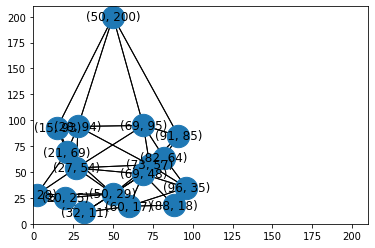

In [102]:
pos = {point: point for point in headPoints}
fig, ax = plt.subplots()
nx.draw(G, pos=pos, node_color='k', ax=ax)
nx.draw(G, pos=pos, node_size=500, ax=ax)  # draw nodes and edges
nx.draw_networkx_labels(G, pos=pos)  # draw node labels/names
# draw edge weights
labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
plt.axis("on")
ax.set_xlim(0, 210)
ax.set_ylim(0,210)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

In [103]:
#Calculating minimum distance from each node to sink node.
min_dist_headNode = []
for i in range(len(headPoints)-1):
    min_dist = nx.shortest_path_length(G,headPoints[i],(50,200), weight='weight')
    CH[i]['Clusterpath'] = (nx.shortest_path(G,headPoints[i],(50,200), weight='weight'))
    min_dist_headNode.append(min_dist)
    
#Assigning head nodes with all the sink nodes distance
for i in range(len(CH)):
  CH[i]['DistSinkNode'] = min_dist_headNode[i]


In [104]:
#Printing all the sensor nodes
for key,allnodes in SN.items():
  print(key,allnodes)

0 {'Nodeid': 'SN[1]', 'x': 1, 'y': 5, 'clusterNo': 1, 'CHid': 'CH(0)', 'CHdist': 27.586228448267445}
1 {'Nodeid': 'SN[2]', 'x': 44, 'y': 6, 'clusterNo': 2, 'CHid': 'CH(1)', 'CHdist': 13.0}
2 {'Nodeid': 'SN[3]', 'x': 24, 'y': 10, 'clusterNo': 1, 'CHid': 'CH(0)', 'CHdist': 15.524174696260024}
3 {'Nodeid': 'SN[4]', 'x': 50, 'y': 29, 'clusterNo': 6, 'CHid': 'CH(5)', 'CHdist': 0.0}
4 {'Nodeid': 'SN[5]', 'x': 81, 'y': 3, 'clusterNo': 4, 'CHid': 'CH(3)', 'CHdist': 16.55294535724685}
5 {'Nodeid': 'SN[6]', 'x': 88, 'y': 14, 'clusterNo': 4, 'CHid': 'CH(3)', 'CHdist': 4.0}
6 {'Nodeid': 'SN[7]', 'x': 24, 'y': 45, 'clusterNo': 5, 'CHid': 'CH(4)', 'CHdist': 27.80287754891569}
7 {'Nodeid': 'SN[8]', 'x': 46, 'y': 19, 'clusterNo': 2, 'CHid': 'CH(1)', 'CHdist': 16.1245154965971}
8 {'Nodeid': 'SN[9]', 'x': 95, 'y': 36, 'clusterNo': 8, 'CHid': 'CH(7)', 'CHdist': 1.4142135623730951}
9 {'Nodeid': 'SN[10]', 'x': 15, 'y': 96, 'clusterNo': 13, 'CHid': 'CH(12)', 'CHdist': 3.0}
10 {'Nodeid': 'SN[11]', 'x': 78, '

In [105]:
#Printing all the cluster head nodes
for key,headNodes in CH.items():
  print(key,headNodes)

0 {'NodeId': 'SN[42]', 'clusterNo': 1, 'DistSinkNode': 197.65724049496387, 'Clusterpath': [(20, 25), (2, 28), (21, 69), (28, 94), (50, 200)]}
1 {'NodeId': 'SN[13]', 'clusterNo': 2, 'DistSinkNode': 206.60633370854228, 'Clusterpath': [(32, 11), (50, 29), (73, 57), (69, 95), (50, 200)]}
2 {'NodeId': 'SN[69]', 'clusterNo': 3, 'DistSinkNode': 187.04403030677372, 'Clusterpath': [(60, 17), (69, 48), (73, 57), (69, 95), (50, 200)]}
3 {'NodeId': 'SN[77]', 'clusterNo': 4, 'DistSinkNode': 190.2745673327652, 'Clusterpath': [(88, 18), (69, 48), (73, 57), (69, 95), (50, 200)]}
4 {'NodeId': 'SN[46]', 'clusterNo': 5, 'DistSinkNode': 179.40895290406922, 'Clusterpath': [(2, 28), (21, 69), (28, 94), (50, 200)]}
5 {'NodeId': 'SN[03]', 'clusterNo': 6, 'DistSinkNode': 181.15048958582656, 'Clusterpath': [(50, 29), (73, 57), (69, 95), (50, 200)]}
6 {'NodeId': 'SN[63]', 'clusterNo': 7, 'DistSinkNode': 154.76400552363577, 'Clusterpath': [(69, 48), (73, 57), (69, 95), (50, 200)]}
7 {'NodeId': 'SN[91]', 'clusterN